<a href="https://colab.research.google.com/github/henrycala/offcorss/blob/master/data_exploring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import os
#Fill the correct info from your github account in this line
!git clone https://<usuario>:<contrasena>@github.com/<usuario>/offcorss.git

Cloning into 'offcorss'...
remote: Enumerating objects: 30, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 30 (delta 7), reused 23 (delta 4), pack-reused 0
Unpacking objects: 100% (30/30), done.


In [62]:
!pip install autocorrect
!pip install wordcloud

In [63]:
from offcorss.data_exploring.data_exploring import *
from matplotlib import pyplot as plt
import nltk
from wordcloud import WordCloud
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Se cargan los datos del repositorio y se aplica correción de ortografía

In [37]:
processed_file_datasatisfaction = 'satisfaction_ratingP'
processed_file_npsresponse = 'NPS_responsesP'
if os.path.exists(os.path.join(os.getcwd(),'offcorss','data_exploring','data',processed_file_datasatisfaction+'.csv')):
    data_satisfaction = loading_data(os.path.join(os.getcwd(),'offcorss','data_exploring','data',processed_file_datasatisfaction+'.csv'))
else:
    start_time = time.time()
    spell = Speller(lang='es')
    data_satisfaction = loading_data(os.path.join(os.getcwd(),'offcorss','data_exploring','data','satisfaction_Ratings.csv'))
    data_satisfaction = spell_correction(data_satisfaction, 'Comment', 'processed comment', spell)
    save_dfdata(data_satisfaction, processed_file_datasatisfaction)
    print(time.time() - start_time)

if os.path.exists(os.path.join(os.getcwd(),'offcorss','data_exploring','data', processed_file_npsresponse+'.csv')):
    data_responses = loading_data(os.path.join(os.getcwd(),'offcorss','data_exploring','data', processed_file_npsresponse+'.csv'))
else:
    start_time = time.time()
    spell = Speller(lang='es')
    data_responses = loading_data(os.path.join(os.getcwd(),'offcorss','data_exploring','data', 'NPS_Responses.csv'))
    data_responses = spell_correction(data_responses, 'Comment', 'processed comment', spell)
    save_dfdata(data_responses, processed_file_npsresponse)
    print(time.time() - start_time)

print('there are ' + str(len(data_satisfaction['Ticket Id'].unique())) + ' unique tickets')
print('there are ' + str(len(data_satisfaction)) + ' tickets')
duplicate_tickets = data_satisfaction.groupby('Ticket Id').size().sort_values(ascending=False).reset_index(name ='tickets count')
duplicate_example = data_satisfaction[data_satisfaction['Ticket Id'] == duplicate_tickets['Ticket Id'][3]]
duplicate_example

there are 2657 unique tickets
there are 2774 tickets


,Unnamed: 0,Requester,User Id,Email,Ticket Id,Brand,Group,Assignee,Satisfaction,Comment,Survey Date,processed comment
2254,2254,leidy huertas,400578886512,leidy.kari96@gmail.com,583147,OFFCORSS,Soporte OFFCORSS,CTS Transporte,good,BUENO POR QUE ME RESPONDIERON UN POCO TIEMPO Y...,2020-07-16T14:12:28-05:00,bueno por que me respondieron un poco tiempo y...
2255,2255,leidy huertas,400578886512,leidy.kari96@gmail.com,583147,OFFCORSS,Soporte OFFCORSS,CTS Transporte,good,BUENO POR QUE ME RESPONDIERON UN POCO TIEMPO Y...,2020-07-16T14:12:00-05:00,bueno por que me respondieron un poco tiempo y...
2256,2256,leidy huertas,400578886512,leidy.kari96@gmail.com,583147,OFFCORSS,Soporte OFFCORSS,CTS Transporte,good,NaN,2020-07-16T14:11:36-05:00,NaN


En el ejemplo de tickets repetidos se observa que existen tickets con repetida ID pero el comentario puede o no puede ser igual. Por consiguiente considero que se deben eliminar los tickets que tengan la misma ID y el mismo comentario

In [45]:
data_satisfaction.drop_duplicates(subset=['Ticket Id', 'processed comment'], inplace = True)
print('there are ' + str(len(data_satisfaction['Ticket Id'].unique())) + ' unique tickets')
print('there are ' + str(len(data_satisfaction)) + ' tickets')
duplicate_tickets = data_satisfaction.groupby('Ticket Id').size().sort_values(ascending=False).reset_index(name ='tickets count')
duplicate_example = data_satisfaction[data_satisfaction['Ticket Id'] == duplicate_tickets['Ticket Id'][2]].reset_index()
print(duplicate_example['processed comment'][0])
print(duplicate_example['processed comment'][1])
print(duplicate_example['processed comment'][2])

there are 2657 unique tickets
there are 2761 tickets
si recibi mi pedido pero porque me comunique con la superintendencia para denunciar a coordinadora, no porque ustedes me ayudaran ni porque coordinadora solucionar. ademas cada que pedia soporte con ustedes contestaba muy feo como si fuera culpa del cliente que tal. para la muestra, la respuesta dada al ultimo correo que envie viendo que al momento que envie el correo aun no habia llegado mi pedido. como ven en la guia, el pedido fue entregado en horas de la tarde despues de casi 15 dias de estar en bodega. deberian ser mas amables con los clientes, y mas si el cliente ya pago. y no tenerlos de lado a lado. nunca mas comprar con ustedes al menos por internet. terrible servicio y logistica.
si recibi mi pedido pero porque me comunique con la superintendencia para denunciar a coordinadora, no porque ustedes me ayudaran ni porque coordinadora solucionar. ademas cada que pedia soporte con ustedes contestaba muy feo como si fuera culpa de

Se observa que apesar de que existen comentarios muy similares, en realidad son diferentes por alguna información extra.

A continuación, se realiza el conteo de las palabras más frecuentes en los comentarios por grupos y satisfacción de los datos 'satisfaction_rating.csv'

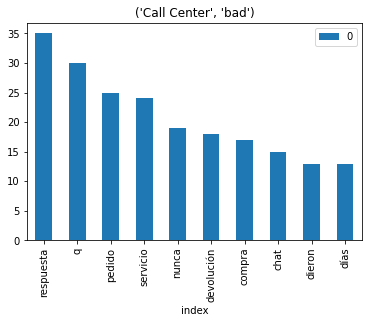

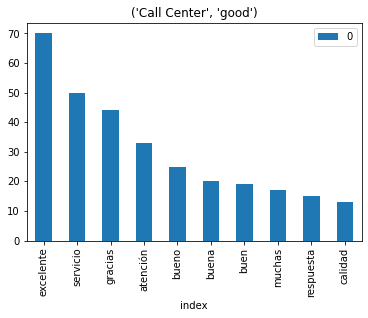

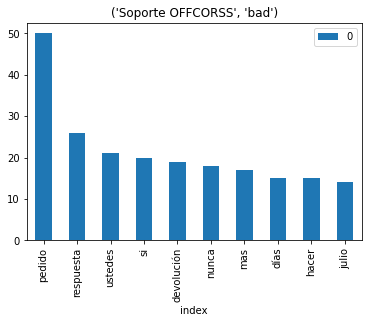

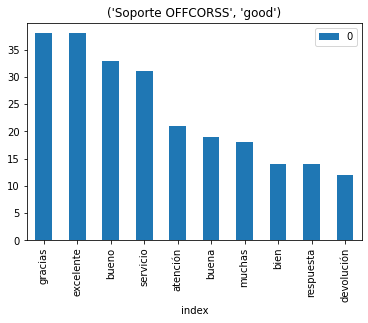

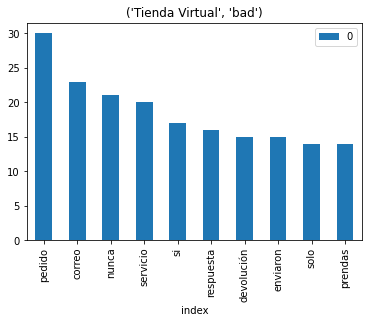

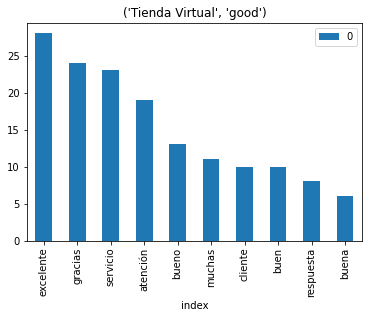

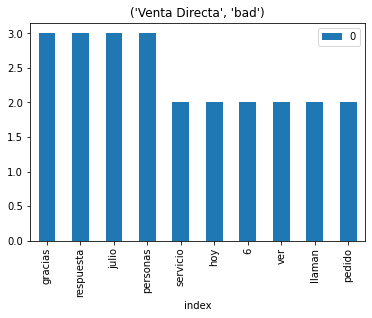

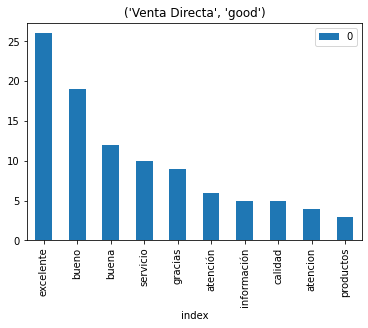

In [59]:
# ds stand form data satisfaction
ds_gruped = data_satisfaction.groupby(['Group', 'Satisfaction'])
for key in ds_gruped.groups.keys():
  groups = ds_gruped.get_group(key)
  word_df = word_count(groups, 'processed comment')
  ax = word_df.head(10).plot.bar(x='index', y=0, rot=90)
  plt.title(key)

Conclusiones sobre los plots

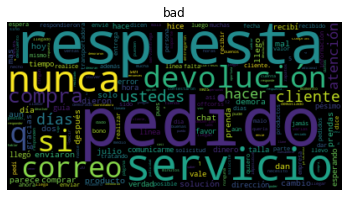

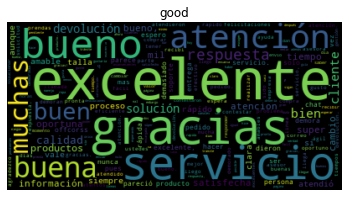

In [67]:
ds_gruped = data_satisfaction.groupby('Satisfaction')
for key in ds_gruped.groups.keys():
  groups = ds_gruped.get_group(key)
  word_df = word_count(groups, 'processed comment')
  tuples = [tuple(x) for x in word_df.values]
  wordcloud = WordCloud()
  wordcloud.generate_from_frequencies(frequencies=dict(tuples))
  plt.figure()
  plt.title(key)
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.axis("off")
  plt.show()


Posteriormente se realiza el mismo proceso con 'NLP_ratings.csv'

In [60]:
data_responses.drop_duplicates(subset=['User Id', 'processed comment'], inplace = True)

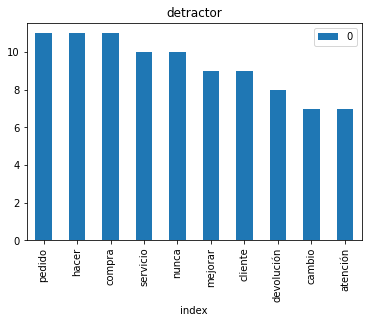

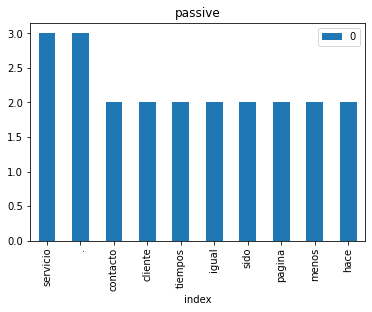

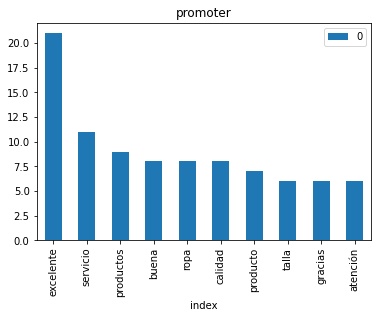

In [61]:
#dr stand for data responses
dr_gruped = data_responses.groupby(['Classification'])
for key in dr_gruped.groups.keys():
  groups = dr_gruped.get_group(key)
  word_df = word_count(groups, 'processed comment')
  word_df.head(10).plot.bar(x='index', y=0, rot=90)
  plt.title(key)

Conclusiones...

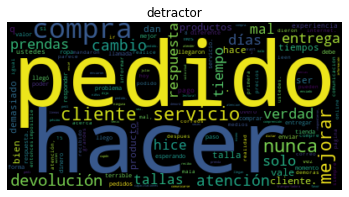

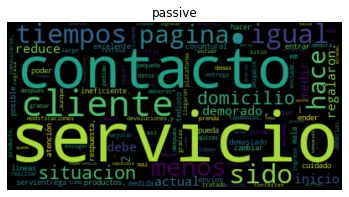

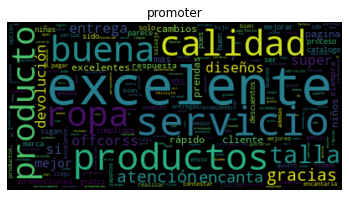

In [68]:
dr_gruped = data_responses.groupby(['Classification'])
for key in dr_gruped.groups.keys():
  groups = dr_gruped.get_group(key)
  word_df = word_count(groups, 'processed comment')
  tuples = [tuple(x) for x in word_df.values]
  wordcloud = WordCloud()
  wordcloud.generate_from_frequencies(frequencies=dict(tuples))
  plt.figure()
  plt.title(key)
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.axis("off")
  plt.show()